In [85]:
import math
import numpy as np
import pandas as pd
import itertools
from Pricing.SABR import SABR_model
from Pricing.black_pricing import BSPricer_SABR
from Pricing.pdf_calculation import numerical_pdf
from Pricing.cdf_calculation import numerical_cdf
from matplotlib import pyplot as plt
from Pricing.arbitrage_check import arbitrage_check

In [86]:
F=[0.02,0.02]
vol=0.4
beta=0.9
rho=0
nu=0.25
#alpha = 0.4 * math.pow(F[0],(1-beta))
expiry=np.array([5,20])
spread = np.arange(-0.02,0.1,0.001)
K = [[0 for y in range(len(spread))] for x in range(len(F))]

for i in range(len(F)):
    for j in range(len(spread)):
        K[i][j]=F[i]+spread[j]        
K=np.array(K)
#K

In [87]:
h=0.0001
bs=BSPricer_SABR(beta,rho,nu)
price=bs.BS_matrix(alpha,F,K,expiry,1,0,'Hagan_ln')
price_plus=bs.BS_matrix(alpha,F,K+h,expiry,1,0,'Hagan_ln')
print('price:')
print(price)
print('price_plus:')
print(price_plus)

price:
[[ 0.01902504  0.01808161  0.01717062  0.01629402  0.01545341  0.01464998
   0.01388441  0.01315692  0.01246733  0.01181509  0.01119934  0.01061898
   0.01007272  0.00955913  0.00907666  0.00862373  0.00819874  0.00780007
   0.00742615  0.00707544  0.00674646  0.00643778  0.00614806  0.00587603
   0.00562047  0.00538027  0.00515436  0.00494176  0.00474156  0.0045529
   0.00437499  0.0042071   0.00404854  0.00389868  0.00375694  0.00362277
   0.00349569  0.00337521  0.00326092  0.00315241  0.00304932  0.0029513
   0.00285805  0.00276925  0.00268465  0.00260399  0.00252703  0.00245356
   0.00238337  0.00231627  0.00225209  0.00219065  0.00213182  0.00207544
   0.00202138  0.00196952  0.00191974  0.00187192  0.00182598  0.0017818
   0.00173931  0.00169842  0.00165904  0.00162111  0.00158454  0.00154929
   0.00151528  0.00148246  0.00145077  0.00142016  0.00139058  0.00136198
   0.00133433  0.00130757  0.00128168  0.00125661  0.00123232  0.00120879
   0.00118598  0.00116387  0.00114

In [88]:
(price_plus-price)/h

array([[-0.95749513, -0.92591148, -0.8923799 , -0.85703617, -0.82030915,
        -0.7826814 , -0.74462586, -0.7065793 , -0.6689289 , -0.63200573,
        -0.59608284, -0.56137654, -0.52805004, -0.49621848, -0.46595481,
        -0.43729603, -0.4102493 , -0.38479763, -0.3609052 , -0.33852188,
        -0.31758719, -0.29803365, -0.27978946, -0.2627807 , -0.24693305,
        -0.23217308, -0.21842928, -0.2056327 , -0.19371751, -0.18262123,
        -0.17228497, -0.16265343, -0.15367492, -0.14530124, -0.13748762,
        -0.1301925 , -0.12337741, -0.11700678, -0.11104774, -0.10546997,
        -0.1002455 , -0.09534854, -0.09075531, -0.08644392, -0.08239418,
        -0.07858749, -0.07500671, -0.07163602, -0.06846085, -0.06546775,
        -0.06264432, -0.05997907, -0.05746144, -0.05508163, -0.05283059,
        -0.05069995, -0.04868195, -0.04676942, -0.04495568, -0.04323457,
        -0.04160036, -0.04004771, -0.03857168, -0.03716768, -0.03583141,
        -0.03455889, -0.03334641, -0.03219051, -0.0

In [93]:
#pdf=numerical_pdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.0001,'Hagan_ln')
cdf=numerical_cdf(alpha,beta,rho,nu,F,K,expiry,1,0,0.0001,'Hagan_ln')

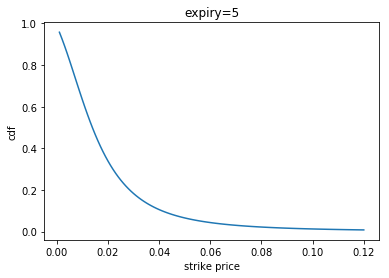

In [94]:
plt.plot(K[0],cdf[0])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=5')
#plt.yticks(np.arange(min(cdf[0]), max(cdf[0])+1, 0.2))
plt.show()

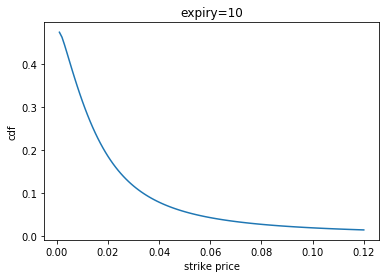

In [95]:
plt.plot(K[1],cdf[1])
plt.xlabel('strike price')
plt.ylabel('cdf')
plt.title('expiry=10')
#plt.yticks(np.arange(min(cdf[1]), max(cdf[1])+1, 0.2))
plt.show()